In [55]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Qt5Agg')
%matplotlib inline

import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category= FutureWarning)
import pandas_profiling

In [2]:
df=pd.read_csv('indian_liver_patient.csv')

# exploratory data analysis

In [3]:
df.shape

(583, 11)

In [4]:
df.head(10)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [5]:
df.dtypes

age                   int64
gender               object
tot_bilirubin       float64
direct_bilirubin    float64
tot_proteins          int64
albumin               int64
ag_ratio              int64
sgpt                float64
sgot                float64
alkphos             float64
is_patient            int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
df['is_patient'].unique()

array([1, 2], dtype=int64)

In [8]:
print(df.is_patient.value_counts())

1    416
2    167
Name: is_patient, dtype: int64


replacing the values 1&2 as 0&1 respectively

In [9]:
df['is_patient']=np.where((df.is_patient== int(1)),int(0), df.is_patient)

In [10]:
df.head(10)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,0
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,0
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,0
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,0
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,0


In [11]:
df['is_patient']= np.where((df.is_patient==int(2)),int(1),df.is_patient)

In [12]:
df.head(10)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,0
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,0
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,0
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,0
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,1
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,0


In [13]:
df['is_patient'].unique()

array([0, 1], dtype=int64)

In [14]:
df['is_patient']=df['is_patient'].apply(pd.to_numeric)

In [15]:
df.dtypes

age                   int64
gender               object
tot_bilirubin       float64
direct_bilirubin    float64
tot_proteins          int64
albumin               int64
ag_ratio              int64
sgpt                float64
sgot                float64
alkphos             float64
is_patient            int64
dtype: object

Number of Zeros (0):  406
Number of Ones (1):  164


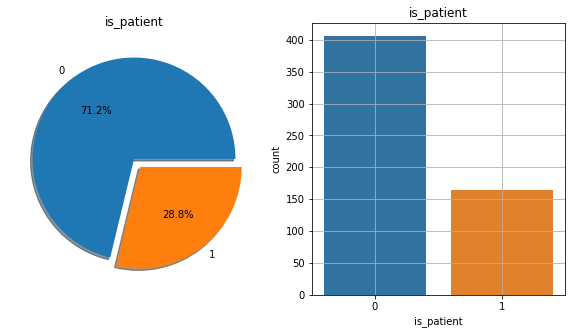

In [20]:
# visulaize the class labels of target variable(Dataset)
import seaborn as sns
import matplotlib.pyplot as plt
f,ax=plt.subplots(1,2,figsize=(10,5))
df['is_patient'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('is_patient')
ax[0].set_ylabel('')
sns.countplot('is_patient',data=df,ax=ax[1])
ax[1].set_title('is_patient')
Zeros, ones = df['is_patient'].value_counts()
print('Number of Zeros (0): ',Zeros)
print('Number of Ones (1): ',ones)
plt.grid()
plt.show()

In [21]:
df=df.drop_duplicates()

In [22]:
df.shape

(570, 11)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               570 non-null    int64  
 1   gender            570 non-null    object 
 2   tot_bilirubin     570 non-null    float64
 3   direct_bilirubin  570 non-null    float64
 4   tot_proteins      570 non-null    int64  
 5   albumin           570 non-null    int64  
 6   ag_ratio          570 non-null    int64  
 7   sgpt              570 non-null    float64
 8   sgot              570 non-null    float64
 9   alkphos           566 non-null    float64
 10  is_patient        570 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.4+ KB


fill value with median

In [24]:
mean_value=df['alkphos'].mean()
print(mean_value)
df['alkphos']= df['alkphos'].fillna(mean_value)


0.9480035335689051


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               570 non-null    int64  
 1   gender            570 non-null    object 
 2   tot_bilirubin     570 non-null    float64
 3   direct_bilirubin  570 non-null    float64
 4   tot_proteins      570 non-null    int64  
 5   albumin           570 non-null    int64  
 6   ag_ratio          570 non-null    int64  
 7   sgpt              570 non-null    float64
 8   sgot              570 non-null    float64
 9   alkphos           570 non-null    float64
 10  is_patient        570 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.4+ KB


In [26]:
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [27]:
df.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,44.849123,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,0.287719
std,16.242182,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.318510,0.453097
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.948004,0.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [28]:
dummy= pd.get_dummies(df['gender'])
dummy.head()

,Female,Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [29]:
df=pd.concat([df,dummy], axis=1)

In [30]:
df=df.drop('gender', axis=1)

In [31]:
df.shape



(570, 12)

In [32]:
df.head()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,Female,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,0,1


In [33]:
df.dtypes

age                   int64
tot_bilirubin       float64
direct_bilirubin    float64
tot_proteins          int64
albumin               int64
ag_ratio              int64
sgpt                float64
sgot                float64
alkphos             float64
is_patient            int64
Female                uint8
Male                  uint8
dtype: object

In [34]:
#create independent and dependent variable
target_name='is_patient'

y=df[target_name]

x=df.drop(target_name, axis=1)

In [35]:
x.head()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,Female,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1


In [36]:
x.shape

(570, 11)

In [37]:
y.shape

(570,)

In [38]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_patient, dtype: int64

# split the dataset 

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
#split into train/ test validation dataset
x_train, x_val, y_train, y_val= train_test_split(x, y, test_size=0.25, random_state=7)

In [41]:
x_train.shape, y_train.shape

((427, 11), (427,))

In [42]:
x_val.shape, y_val.shape

((143, 11), (143,))

In [43]:
x_train.dtypes, y_train.dtypes

(age                   int64
 tot_bilirubin       float64
 direct_bilirubin    float64
 tot_proteins          int64
 albumin               int64
 ag_ratio              int64
 sgpt                float64
 sgot                float64
 alkphos             float64
 Female                uint8
 Male                  uint8
 dtype: object,
 dtype('int64'))

# feature scaling

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_val=sc.transform(x_val)

# fit the logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [46]:
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
params = dict(solver=solver_list)
log_reg = LogisticRegression(C=1, n_jobs=-1, random_state=34)
clf = GridSearchCV(log_reg, params, cv=5)
clf.fit(x_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\DELL\anaconda3\lib\site-packages\sklear

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=34, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [47]:
accuracy=clf.best_score_

In [48]:
accuracy

0.7258276333789331

# Build the algorithm

In [49]:
lr=LogisticRegression(n_jobs=-1,random_state=34,solver='lbfgs')
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=34,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

### coefficient and intercept point

In [49]:
print(lr.coef_)

[[-0.25032348 -0.30309496 -0.85971966 -0.22677165 -1.36939576 -1.01369158
  -0.47557927  0.64142827 -0.20603339 -0.02476003  0.02476003]]


In [50]:
print(lr.intercept_)

[-1.66854817]


In [50]:
lr_pred=lr.predict_proba(x_val)

### calibration plot

In [51]:
from sklearn.calibration import calibration_curve
lr_y,lr_x= calibration_curve(y_val,lr_pred[:,1],n_bins=100)

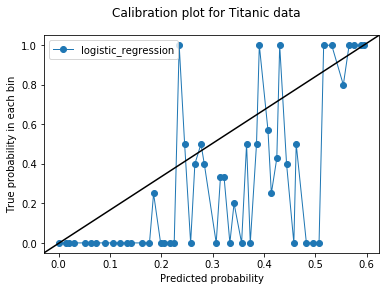

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(lr_x,lr_y, marker='o', linewidth=1, label='logistic_regression')


# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot for Titanic data')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

# applying model on validation data

In [48]:
lr_y_pred= clf.predict(x_val)

In [49]:
lr_y_pred.shape

(143,)

# evaluation matrix on the model

In [50]:
#train score of logistic regression
lr_train_score= round(clf.score(x_train, y_train) * 100,2)

In [51]:
print('training score of logistic regression:', lr_train_score)

training score of logistic regression: 72.37


In [52]:
lr_val_score= round(clf.score(x_val, y_val)*100, 2)
print('validation score of logistic regression:-', lr_val_score)

validation score of logistic regression:- 78.32


# accuraccy score

In [51]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_val, lr_y_pred)
print(cm)

[[101   2]
 [ 29  11]]


In [52]:
TP= cm[0,0]
TN= cm[1,1]
FP= cm[0,1]
FN= cm[1,0]

In [53]:
TP


101

In [54]:
FP

2

In [55]:
#print classification accuracy
#acuraccy= correct predictions (tp+tn)/ total prediction (tp+tn+fp+fn)
classification_acuracy= (TP+TN)/ float(TP+TN+FP+FN)
print('classification accuraccy :{0:0.4f}'.format(classification_acuracy))

classification accuraccy :0.7832


In [56]:
from sklearn.metrics import accuracy_score

In [57]:
print('accuracy score is',accuracy_score(y_val, lr_y_pred)*100)

accuracy score is 78.32167832167832


In [58]:
#classification error
classification_error= (FP+FN)/(TP+TN+FP+FN)
print('classification error: {0:0.4f}'.format(classification_error))

classification error: 0.2168


In [59]:
pd.crosstab(y_val, lr_y_pred, margins=False)

col_0,0,1
is_patient,,
0,101,2
1,29,11


In [60]:
pd.crosstab(y_val, lr_y_pred, margins=True)

col_0,0,1,All
is_patient,,,
0,101,2,103
1,29,11,40
All,130,13,143


## Precision

In [61]:
precision= TP/(TP+FP)
print(precision)

0.9805825242718447


In [62]:
from sklearn.metrics import precision_score
print("precision Score of macro is:", precision_score(y_val,lr_y_pred, average='macro')*100)
print("precision Score of micro is:", precision_score(y_val,lr_y_pred, average='micro')*100)
print("precision Score of weighted is:", precision_score(y_val,lr_y_pred, average='weighted')*100)

precision Score of macro is: 81.15384615384616
precision Score of micro is: 78.32167832167832
precision Score of weighted is: 79.62883270575578


## Recall

In [63]:
recall=TP/(TP+FN)
print(recall)

0.7769230769230769


In [78]:
from sklearn.metrics import recall_score
print("recall_Score of macro is:",recall_score(y_val,lr_y_pred, average='macro')*100)
print("recall_Score of micro is:",recall_score(y_val,lr_y_pred, average='micro')*100)
print("recall_Score of weighted is:",recall_score(y_val,lr_y_pred, average='weighted')*100)

recall_Score of macro is: 62.77912621359223
recall_Score of micro is: 78.32167832167832
recall_Score of weighted is: 78.32167832167832


## f1-score

In [79]:
from sklearn.metrics import f1_score
print('f1_score of macro :',f1_score(y_val, lr_y_pred, average='macro')*100)
print('f1_score of micro :',f1_score(y_val, lr_y_pred, average='micro')*100)
print('f1_score of weighted :',f1_score(y_val, lr_y_pred, average='weighted')*100)

f1_score of macro : 64.10235646611062
f1_score of micro : 78.32167832167832
f1_score of weighted : 74.05588176500802


## Roc-curve

In [64]:
y_pred_prob = lr.predict_proba(x_val)[0:10]

y_pred_prob

array([[5.69347485e-01, 4.30652515e-01],
       [9.99679774e-01, 3.20225521e-04],
       [7.21901430e-01, 2.78098570e-01],
       [8.14055557e-01, 1.85944443e-01],
       [6.44252380e-01, 3.55747620e-01],
       [6.12920705e-01, 3.87079295e-01],
       [6.57530752e-01, 3.42469248e-01],
       [4.44749750e-01, 5.55250250e-01],
       [9.26990217e-01, 7.30097831e-02],
       [7.31069414e-01, 2.68930586e-01]])

In [65]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of -  Disease have(0)', 'Prob of -no disease (1)'])

y_pred_prob_df

,Prob of - Disease have(0),Prob of -no disease (1)
0,0.569347,0.430653
1,0.999680,0.000320
2,0.721901,0.278099
3,0.814056,0.185944
4,0.644252,0.355748
5,0.612921,0.387079
6,0.657531,0.342469
7,0.444750,0.555250
8,0.926990,0.073010
9,0.731069,0.268931


In [66]:
# print the first 10 predicted probabilities for class 1 - Probability of Disease

lr.predict_proba(x_val)[0:10, 1]

array([4.30652515e-01, 3.20225521e-04, 2.78098570e-01, 1.85944443e-01,
       3.55747620e-01, 3.87079295e-01, 3.42469248e-01, 5.55250250e-01,
       7.30097831e-02, 2.68930586e-01])

In [67]:
# store the predicted probabilities for class 1 - Probability of disease
y_pred_prob = lr.predict_proba(x_val)[:,1]

In [68]:
y_pred_prob.shape

(143,)

In [69]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

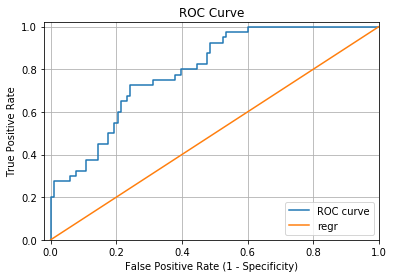

In [70]:
FPR,TPR, thresholds = roc_curve(y_val, y_pred_prob)
# create plot
plt.plot(FPR,TPR, label='ROC curve')
plt.plot([0, 1], [0, 1],label='regr')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")
plt.grid()
plt.show()

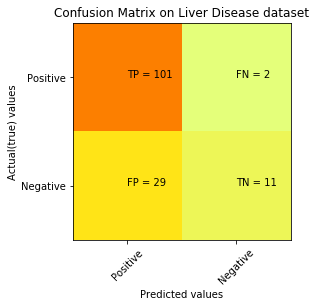

In [71]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Positive','Negative']
plt.title('Confusion Matrix on Liver Disease dataset')
plt.ylabel('Actual(true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [72]:
from sklearn.metrics import classification_report

In [73]:
print('classification report', classification_report(y_val,lr_y_pred, digits=4))

classification report               precision    recall  f1-score   support

           0     0.7769    0.9806    0.8670       103
           1     0.8462    0.2750    0.4151        40

    accuracy                         0.7832       143
   macro avg     0.8115    0.6278    0.6410       143
weighted avg     0.7963    0.7832    0.7406       143

